In [32]:
# Data Analytics I
#     Create a Linear Regression Model using Python/R to predict home prices using Boston
#     Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset
#     contains information about various houses in Boston through different parameters. There
#     are 506 samplesand 14 feature variables in this dataset.
#     The objective is to predict the value of prices of the house using the given features

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
df = pd.read_csv("datasets/Boston.csv")

In [35]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [36]:
# Step 2: Explore and clean the data
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB
Dataset Info:
 None

Missing Values:
 Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm          

In [37]:
# # Step 3: Visualize feature correlation
# plt.figure(figsize=(12, 10))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title("Feature Correlation Heatmap")

In [38]:
x = df.drop('medv', axis=1)
y = df['medv']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [39]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)
print(y_pred[:5])
print(y_pred_train[:5])

[28.61693942 36.30028466 14.31747783 26.13015646 18.70581899]
[25.91482445 24.19743406 22.70901908 22.21420506 16.59021382]


In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: ", mse)
print(f"R² Score: ", r2)


Mean Squared Error:  21.969368008054033
R² Score:  0.7051609808903432


In [41]:
print("Training accuracy is:")
print(lr.score(x_train, y_train))

print("Testing accuracy is:")
print(lr.score(x_test, y_test))

Training accuracy is:
0.7459101679237474
Testing accuracy is:
0.7051609808903432


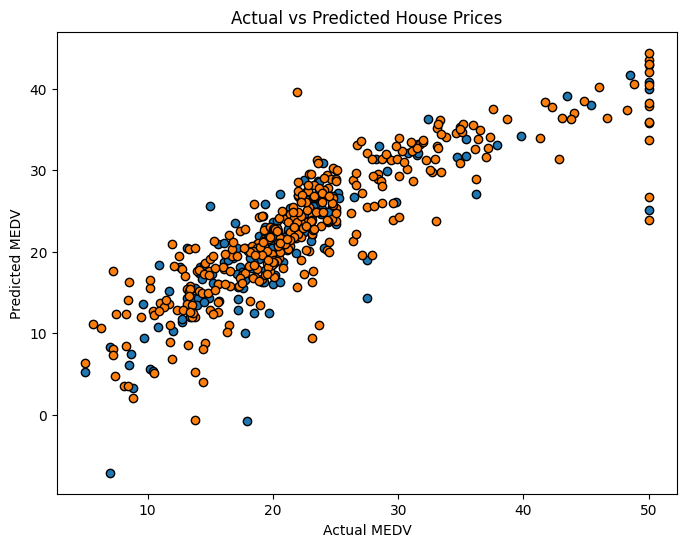

In [42]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.scatter(y_train, y_pred_train, edgecolors=(0, 0, 0))
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.show()
